In [1]:
%pip install pandas
%pip install numpy



[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### **Q1.**

In [2]:
# References

'''
https://pandas.pydata.org/docs/reference/api/pandas.read_table.html
https://pandas.pydata.org/docs/user_guide/merging.html

'''

'\nhttps://pandas.pydata.org/docs/reference/api/pandas.read_table.html\nhttps://pandas.pydata.org/docs/user_guide/merging.html\n\n'

In [3]:
# Step 1. Import the necessary libraries

import pandas as pd
import numpy as np

In [4]:
# Step 2. Import the dataset from this address. 
# Step 3. Assign it to a variable called users

# Dataset

q1_dataset = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

users = pd.read_table(q1_dataset, sep='|')

users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [5]:
# Step 4. Discover what is the mean age per occupation

mean_age = users.groupby('occupation')['age'].mean().reset_index().round(3)

mean_age

,occupation,age
0,administrator,38.747
1,artist,31.393
2,doctor,43.571
3,educator,42.011
4,engineer,36.388
5,entertainment,29.222
6,executive,38.719
7,healthcare,41.562
8,homemaker,32.571
9,lawyer,36.750


In [6]:
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least

ratio_ = users.groupby('occupation')['gender'].value_counts(normalize=True)*100

In [7]:
ratio_new = pd.DataFrame(ratio_)
ratio_new.rename(columns={"gender":"ratio"}, inplace=True)

In [8]:
new_ratio = pd.DataFrame(ratio_new.reset_index(level=["occupation", "gender"]))

In [9]:
male_ratio = new_ratio[new_ratio["gender"] == "M"].sort_values(by="ratio",ascending=False)
male_ratio

,occupation,gender,ratio
4,doctor,M,100.000000
7,engineer,M,97.014925
37,technician,M,96.296296
29,retired,M,92.857143
27,programmer,M,90.909091
11,executive,M,90.625000
33,scientist,M,90.322581
9,entertainment,M,88.888889
17,lawyer,M,83.333333
31,salesman,M,75.000000


In [10]:
# Step 6. For each occupation, calculate the minimum and maximum ages

users.groupby("occupation").age.agg([min, max])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [11]:
# Step 7. For each combination of occupation and sex, calculate the mean age

mean_age_combination = users.groupby(['occupation', 'gender'])['age'].mean().reset_index().round(3)

mean_age_combination

,occupation,gender,age
0,administrator,F,40.639
1,administrator,M,37.163
2,artist,F,30.308
3,artist,M,32.333
4,doctor,M,43.571
5,educator,F,39.115
6,educator,M,43.101
7,engineer,F,29.500
8,engineer,M,36.600
9,entertainment,F,31.000


In [12]:
# Step 8. For each occupation present the percentage of women and men

percentage = users.groupby('occupation')['gender'].value_counts(normalize=True)*100

percentage_ = pd.DataFrame(percentage)
percentage_.rename(columns={"gender":"percentage"}, inplace=True)

final_percentage = pd.DataFrame(percentage_.reset_index(level=["occupation", "gender"]))
final_percentage

,occupation,gender,percentage
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000
5,educator,M,72.631579
6,educator,F,27.368421
7,engineer,M,97.014925
8,engineer,F,2.985075
9,entertainment,M,88.888889


### **Q2.**

In [13]:
# Step 1. Import the necessary libraries

# Libraries

import pandas as pd
import numpy as np

In [14]:
# Step 2. Import the dataset from this address
# Step 3. Assign it to a variable called euro12

# Dataset

q2_dataset = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

euro12 = pd.read_csv(q2_dataset)

euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [15]:
# Viewing all column names

for column in euro12.columns:
    if column == euro12.columns[-1]:
        print(column)
    else:
        print(column, end=", ")

Team, Goals, Shots on target, Shots off target, Shooting Accuracy, % Goals-to-shots, Total shots (inc. Blocked), Hit Woodwork, Penalty goals, Penalties not scored, Headed goals, Passes, Passes completed, Passing Accuracy, Touches, Crosses, Dribbles, Corners Taken, Tackles, Clearances, Interceptions, Clearances off line, Clean Sheets, Blocks, Goals conceded, Saves made, Saves-to-shots ratio, Fouls Won, Fouls Conceded, Offsides, Yellow Cards, Red Cards, Subs on, Subs off, Players Used


In [16]:
# Step 4. Select only the Goal column

goal_column = euro12["Goals"]
goal_column = pd.DataFrame(goal_column)

goal_column

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [17]:
# Step 5. How many team participated in the Euro2012?

team_column_count = euro12["Team"].count()

print("Number of teams that participated in Euro2012: ", team_column_count)

Number of teams that participated in Euro2012:  16


In [18]:
# Step 6. What is the number of columns in the dataset?

dataset_columns = euro12.columns

print("Count of columns is: ", len(dataset_columns))

Count of columns is:  35


In [19]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

euro12[["Team", "Yellow Cards", "Red Cards"]]

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [20]:
discpline = pd.DataFrame(euro12[["Team", "Yellow Cards", "Red Cards"]])

discpline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [21]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards

sorted_teams = discpline.sort_values(['Red Cards', 'Yellow Cards'])

sorted_teams

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [22]:
# Step 9. Calculate the mean Yellow Cards given per Team
yellow_card_mean = discpline.groupby('Team')['Yellow Cards'].mean().reset_index()

yellow_card_mean

,Team,Yellow Cards
0,Croatia,9.0
1,Czech Republic,7.0
2,Denmark,4.0
3,England,5.0
4,France,6.0
5,Germany,4.0
6,Greece,9.0
7,Italy,16.0
8,Netherlands,5.0
9,Poland,7.0


In [23]:
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [24]:
# Step 10. Filter teams that scored more than 6 goals

euro12[euro12["Goals"] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [25]:
# Step 11. Select the teams that start with G

teams_list = []

for x in euro12["Team"]:
    if x[0] == "G":
        teams_list.append(x)
    
print("Teams starting with G are: ", teams_list)

Teams starting with G are:  ['Germany', 'Greece']


In [26]:
euro12.columns[:7]

Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)'],
      dtype='object')

In [27]:
# Step 12. Select the first 7 columns

euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [28]:
euro12.columns

Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')

In [29]:
# Step 13. Select all columns except the last 3

euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [30]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia

shooting_accuracy = euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
shooting_accuracy

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


### **Q3.**

In [31]:
# Step 1. Import the necessary libraries

# Libraries

import pandas as pd
import numpy as np

In [32]:
# Step 2. Create 3 differents Series, each of length 100, as follows:
#    The first a random number from 1 to 4
#    The second a random number from 1 to 3
#    The third a random number from 10,000 to 30,000

series_1 = pd.Series(
            np.random.randint(
                1,
                high=5,
                size=100,
                dtype='l'
                )
            )

series_2 = pd.Series(
            np.random.randint(
                1,
                high=4,
                size=100,
                dtype='l'
                )
            )

series_3 = pd.Series(
            np.random.randint(
                10000,
                high=30001,
                size=100,
                dtype='l'
                )
            )

In [33]:
series_1, series_2, series_3

(0     4
 1     3
 2     4
 3     3
 4     3
      ..
 95    4
 96    3
 97    3
 98    3
 99    2
 Length: 100, dtype: int32,
 0     1
 1     3
 2     2
 3     2
 4     2
      ..
 95    3
 96    1
 97    2
 98    2
 99    1
 Length: 100, dtype: int32,
 0     16515
 1     19394
 2     24728
 3     17451
 4     10242
       ...  
 95    11031
 96    14396
 97    23865
 98    28642
 99    18450
 Length: 100, dtype: int32)

In [34]:
# Step 3. Create a DataFrame by joinning the Series by column

joined_df = pd.DataFrame(pd.concat([series_1, series_2, series_3], axis=1))
joined_df

,0,1,2
0,4,1,16515
1,3,3,19394
2,4,2,24728
3,3,2,17451
4,3,2,10242
...,...,...,...
95,4,3,11031
96,3,1,14396
97,3,2,23865
98,3,2,28642


In [35]:
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

joined_df.rename(columns = {0:'bedrs', 1:'bathrs', 2:'price_sqr_meter'}, inplace = True)
joined_df

,bedrs,bathrs,price_sqr_meter
0,4,1,16515
1,3,3,19394
2,4,2,24728
3,3,2,17451
4,3,2,10242
...,...,...,...
95,4,3,11031
96,3,1,14396
97,3,2,23865
98,3,2,28642


In [36]:
# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

big_column_var = pd.DataFrame(pd.concat([series_1, series_2, series_3]))
big_column_var.rename(columns = {0:'bigcolumn'}, inplace = True)
big_column_var

,bigcolumn
0,4
1,3
2,4
3,3
4,3
...,...
95,11031
96,14396
97,23865
98,28642


In [37]:
# Step 6. Ops it seems it is going only until index 99. Is it true?

'''
Yes it is true. From the above we see the index is only till 99 even if the number of rows are 300
'''

'\nYes it is true. From the above we see the index is only till 99 even if the number of rows are 300\n'

In [38]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299

big_column_var.reset_index(drop=True, inplace=True)
big_column_var

,bigcolumn
0,4
1,3
2,4
3,3
4,3
...,...
295,11031
296,14396
297,23865
298,28642


In [39]:
# Step 1. Import the necessary libraries

# Libraries

import pandas as pd
import numpy as np

In [40]:
# Step 2. Import the dataset from the attached file wind.txt

data = pd.read_csv('wind.txt', header=0, delim_whitespace=True)
data.head(10)

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
5,61,1,6,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
6,61,1,7,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
7,61,1,8,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
8,61,1,9,12.58,10.83,10.00,4.75,10.37,6.79,8.04,10.13,7.79,9.08,13.04,15.37
9,61,1,10,13.37,11.12,19.50,8.33,9.71,6.54,11.42,7.79,8.54,9.00,8.58,11.83


In [41]:
# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

data['Date'] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data.head(10)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05
5,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17,2061-01-06
6,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79,2061-01-07
7,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46,2061-01-08
8,12.58,10.83,10.00,4.75,10.37,6.79,8.04,10.13,7.79,9.08,13.04,15.37,2061-01-09
9,13.37,11.12,19.50,8.33,9.71,6.54,11.42,7.79,8.54,9.00,8.58,11.83,2061-01-10


In [42]:
# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

import datetime

def fixer(input):
    if input.year > 2022:
        year = input.year - 100
    else:
        year = input.year
    
    return datetime.date(year, input.month, input.day)

data['Date'] = data['Date'].apply(fixer)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


In [43]:
# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

data["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6574 entries, 0 to 6573
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
6574 non-null   object
dtypes: object(1)
memory usage: 51.5+ KB


In [44]:
data["Date"] = pd.to_datetime(data["Date"])
data["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6574 entries, 0 to 6573
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
6574 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 51.5 KB


In [45]:
data = data.set_index("Date")

data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [46]:
# Step 6. Compute how many values are missing for each location over the entire record.

empty_values = data.isnull().sum()

index = 0
total = 0

for x in empty_values:
    print(f'For location "{data.columns[index]}" there are {x} values missing')
    index += 1
    total += x

print(f'\nThere are {total} missing values')

For location "RPT" there are 6 values missing
For location "VAL" there are 3 values missing
For location "ROS" there are 2 values missing
For location "KIL" there are 5 values missing
For location "SHA" there are 2 values missing
For location "BIR" there are 0 values missing
For location "DUB" there are 3 values missing
For location "CLA" there are 2 values missing
For location "MUL" there are 3 values missing
For location "CLO" there are 1 values missing
For location "BEL" there are 0 values missing
For location "MAL" there are 4 values missing

There are 31 missing values


In [47]:
# Step 7. Compute how many non-missing values there are in total.

non_missing = data.notna().sum()

total = 0

for x in non_missing:
    total += x

print(f'\nThere are {total} non-missing values')


There are 78857 non-missing values


In [48]:
# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.

average_windspeeds = data.mean()

index = 0
total = 0

for x in average_windspeeds:
    print(f'For location "{data.columns[index]}" the average windspeed is: {round(x,2)} KNOTS')
    index += 1
    total += round(x,2)

print(f'\nTotal mean is: {round(total/index, 2)}')

For location "RPT" the average windspeed is: 12.36 KNOTS
For location "VAL" the average windspeed is: 10.64 KNOTS
For location "ROS" the average windspeed is: 11.66 KNOTS
For location "KIL" the average windspeed is: 6.31 KNOTS
For location "SHA" the average windspeed is: 10.46 KNOTS
For location "BIR" the average windspeed is: 7.09 KNOTS
For location "DUB" the average windspeed is: 9.8 KNOTS
For location "CLA" the average windspeed is: 8.5 KNOTS
For location "MUL" the average windspeed is: 8.49 KNOTS
For location "CLO" the average windspeed is: 8.71 KNOTS
For location "BEL" the average windspeed is: 13.12 KNOTS
For location "MAL" the average windspeed is: 15.6 KNOTS

Total mean is: 10.23


In [49]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [50]:
import pandas as pd

In [51]:
# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at 
# each location over all the days

loc_stats = pd.DataFrame(columns=["Location", "Max", "Min", "Mean"])
loc_stats

,Location,Max,Min,Mean


In [52]:
index = 0

for x in data.columns:

    data_index = data.columns[index]
    data_max = data[x].max()
    data_min = data[x].min()
    data_mean = round(data[x].mean(), 2)
    
    data_frame = pd.DataFrame({'Location':[data_index], 'Max':[data_max], 'Min':[data_min], 'Mean':[data_mean]})

    loc_stats = pd.concat([loc_stats, data_frame], ignore_index=True)

    index += 1

loc_stats.set_index('Location')

,Max,Min,Mean
Location,,,
RPT,35.80,0.67,12.36
VAL,33.37,0.21,10.64
ROS,33.84,1.50,11.66
KIL,28.46,0.00,6.31
SHA,37.54,0.13,10.46
BIR,26.16,0.00,7.09
DUB,30.37,0.00,9.80
CLA,31.08,0.00,8.50
MUL,25.88,0.00,8.49


In [53]:
# ALTERNATIVE AND MUCH SIMPLER METHOD!!!
# Remembered this much later :(

data.describe().loc[['max','min', 'mean', 'std']]

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [54]:
# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across 
# all the locations at each day.

data_ = data.T  # Transposing to switch columns and rows

data_.describe().loc[['max','min', 'mean', 'std']]

Date,1961-01-01,1961-01-02,1961-01-03,1961-01-04,1961-01-05,1961-01-06,1961-01-07,1961-01-08,1961-01-09,1961-01-10,...,1978-12-22,1978-12-23,1978-12-24,1978-12-25,1978-12-26,1978-12-27,1978-12-28,1978-12-29,1978-12-30,1978-12-31
max,18.500000,17.540000,18.500000,11.750000,13.330000,13.210000,14.290000,16.620000,15.370000,19.50000,...,13.080000,22.210000,31.710000,13.960000,13.830000,40.080000,41.460000,29.580000,28.790000,27.290000
min,9.290000,6.500000,6.170000,1.790000,6.170000,4.420000,4.960000,5.910000,4.750000,6.54000,...,2.460000,9.500000,4.790000,0.750000,1.960000,8.080000,5.000000,8.710000,9.130000,9.590000
mean,13.018182,11.336364,11.641818,6.619167,10.630000,8.240000,10.385000,10.487500,9.897500,10.47750,...,7.000833,15.613333,10.823333,5.729167,6.523333,16.708333,15.150000,14.890000,15.367500,15.402500
std,2.808875,3.188994,3.681912,3.198126,2.445356,2.998063,3.072114,3.547237,2.905954,3.44261,...,3.237337,3.850840,7.195039,3.583263,4.304510,7.868076,9.687857,5.756836,5.540437,5.702483


In [55]:
# Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

jan_means = data.loc[data.index.month == 1].mean()

index = 0

for x in jan_means:
    print(f'For location "{data.columns[index]}" the average windspeed in January is: {round(x,2)} KNOTS')
    index += 1


For location "RPT" the average windspeed in January is: 14.85 KNOTS
For location "VAL" the average windspeed in January is: 12.91 KNOTS
For location "ROS" the average windspeed in January is: 13.3 KNOTS
For location "KIL" the average windspeed in January is: 7.2 KNOTS
For location "SHA" the average windspeed in January is: 11.67 KNOTS
For location "BIR" the average windspeed in January is: 8.05 KNOTS
For location "DUB" the average windspeed in January is: 11.82 KNOTS
For location "CLA" the average windspeed in January is: 9.51 KNOTS
For location "MUL" the average windspeed in January is: 9.54 KNOTS
For location "CLO" the average windspeed in January is: 10.05 KNOTS
For location "BEL" the average windspeed in January is: 14.55 KNOTS
For location "MAL" the average windspeed in January is: 18.03 KNOTS


In [56]:
# Step 12. Downsample the record to a yearly frequency for each location. 
# Step 13. Downsample the record to a monthly frequency for each location. 
# Step 14. Downsample the record to a weekly frequency for each location.

In [57]:
data.resample('AS').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-01-01,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-01-01,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-01-01,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-01-01,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-01-01,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-01-01,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-01-01,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-01-01,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [58]:
data.resample('MS').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-01,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-01,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-01,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-01,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-01,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-01,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-01,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [59]:
data.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [60]:
# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week 
# (assume that the first week starts on January 2 1961) for the first 52 weeks.

data_2_1 = data.resample('W').mean()
data_2 = data_2_1[1:53]  # First 52 weeks
data_2.describe().loc[['max','min', 'mean', 'std']]

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
max,19.880000,16.417143,18.225714,12.720000,17.432857,14.828571,15.565714,15.160000,14.480000,16.461429,21.832857,23.641429
min,4.202857,4.255714,6.738571,3.300000,6.112857,2.715714,3.964286,4.257143,4.501429,6.031429,5.875714,5.737143
mean,12.289130,10.332060,11.347326,6.946740,10.876502,7.723846,9.730810,8.843375,8.653617,9.820893,13.489066,13.681625
std,3.402637,2.831028,2.847221,2.067368,2.677186,2.431632,2.812689,2.456673,2.409221,2.585514,3.615946,3.580699


### **Q5.**

In [61]:
# Step 1. Import the necessary libraries

import pandas as pd
import numpy as np

In [62]:
# Step 2. Import the dataset from this address. 
# Step 3. Assign it to a variable called chipo.

q5_dataset = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

chipo = pd.read_csv(q5_dataset, sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [63]:
# Step 4. See the first 10 entries

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [64]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [65]:
# Step 5. What is the number of observations in the dataset? 
# There are 4622 observations

# Step 6. What is the number of columns in the dataset?
# There are 5 columns

In [66]:
# Step 7. Print the name of all the columns.

for columns_ in chipo.columns:
    print(columns_)

order_id
quantity
item_name
choice_description
item_price


In [67]:
# Step 8. How is the dataset indexed?

chipo.index

# It is indexed based on the number of observations

RangeIndex(start=0, stop=4622, step=1)

In [68]:
# Step 9. Which was the most-ordered item?
# Step 10. For the most-ordered item, how many items were ordered?

ordered_ = chipo.groupby(['item_name']).sum().sort_values(['quantity'],ascending=False)
ordered_.head(5)

# Chicken Bowl was the most ordered item
# There were 761 quantities

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


In [69]:
# Step 11. What was the most ordered item in the choice_description column?

ordered_choice = chipo.groupby(['choice_description']).sum().sort_values(['quantity'],ascending=False)
ordered_choice.head(5)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159
[Coke],122752,143
[Sprite],80426,89
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",43088,49
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",36041,42


In [70]:
# Step 12. How many items were orderd in total?

print(f"The total number of ordered items were: {ordered_['quantity'].sum()}")

The total number of ordered items were: 4972


In [71]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [72]:
# Step 13.
#  Turn the item price into a float
#  Check the item price type
#  Create a lambda function and change the type of item price
#  Check the item price type

chipo['item_price'].info()  # checking type

<class 'pandas.core.series.Series'>
RangeIndex: 4622 entries, 0 to 4621
Series name: item_price
Non-Null Count  Dtype 
--------------  ----- 
4622 non-null   object
dtypes: object(1)
memory usage: 36.2+ KB


In [73]:
# Removing the $ symbol

chipo['item_price'] = chipo['item_price'].str[1:]
chipo['item_price']

0        2.39 
1        3.39 
2        3.39 
3        2.39 
4       16.98 
         ...  
4617    11.75 
4618    11.75 
4619    11.25 
4620     8.75 
4621     8.75 
Name: item_price, Length: 4622, dtype: object

In [74]:
# Changing data type using lambda function 

chipo['item_price'] = chipo['item_price'].apply(lambda x: pd.to_numeric(x))

In [75]:
chipo['item_price'].info()  # checking type

<class 'pandas.core.series.Series'>
RangeIndex: 4622 entries, 0 to 4621
Series name: item_price
Non-Null Count  Dtype  
--------------  -----  
4622 non-null   float64
dtypes: float64(1)
memory usage: 36.2 KB


In [76]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [77]:
# Step 14. How much was the revenue for the period in the dataset?

print(f"The revenue for the period is: ${(chipo['quantity'] * chipo['item_price']).sum()}")

The revenue for the period is: $39237.02


In [78]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [79]:
# Step 15. How many orders were made in the period?

print(f"The number of orders are: {chipo['order_id'].unique()[-1]}")

# If this column contains the numbers (sorted) that represent the orders by one person and each repitition of a number represents multiple 
# orders by the same person, then the last value of all of the unique values shows the number of orders made.

The number of orders are: 1834


In [99]:
# Step 16. What is the average revenue amount per order?

chipo['revenue'] = chipo['quantity'] * chipo['item_price']
chipo.groupby('order_id')['revenue'].mean()

order_id
1        2.890000
2       33.960000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: revenue, Length: 1834, dtype: float64

In [81]:
chipo

,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


In [82]:
# Step 17. How many different items are sold?

print(f"The number of items sold are: {len(chipo['item_name'].unique())}")

The number of items sold are: 50


### **Q6.**

In [83]:
%pip install matplotlib



[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
# Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. 
# Label both lines and show the legend.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
q6_data_csv = pd.read_csv('us-marriages-divorces-1867-2014.csv')
q6_data_csv

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


Text(0, 0.5, 'Marriages & Divorces in Millions\n')

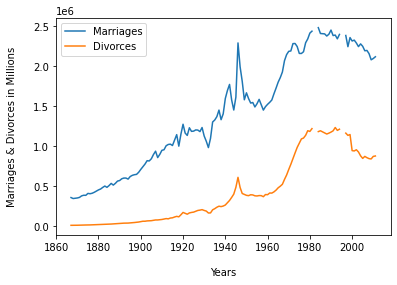

In [86]:
q6_plot = q6_data_csv.plot(x = 'Year', y=['Marriages', 'Divorces'], kind='line')
q6_plot.set_xlabel("\nYears")
q6_plot.set_ylabel("Marriages & Divorces in Millions\n")

### **Q7.**

In [87]:
import pandas as pd
import numpy as np

In [88]:
# Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

q7_data_csv = pd.read_csv('us-marriages-divorces-1867-2014.csv')

q7_new_  = q7_data_csv[q7_data_csv['Year'].apply(lambda x: x in [1900, 1950, 2000])]


Text(0, 0.5, 'Marriages & Divorces in Millions\n')

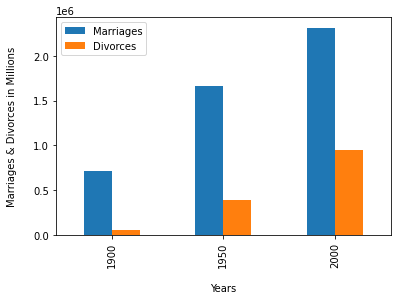

In [89]:
q7_plot = q7_new_.plot(x = 'Year', y=['Marriages', 'Divorces'], kind='bar')
q7_plot.set_xlabel("\nYears")
q7_plot.set_ylabel("Marriages & Divorces in Millions\n")

### **Q8.**

In [90]:
# Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with 
# the corresponding actor's name. Don't forget to label your axes!

In [91]:
q8_data_csv = pd.read_csv('actor_kill_counts.csv')

q8_data_csv

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


Text(0, 0.5, 'Kill Count\n')

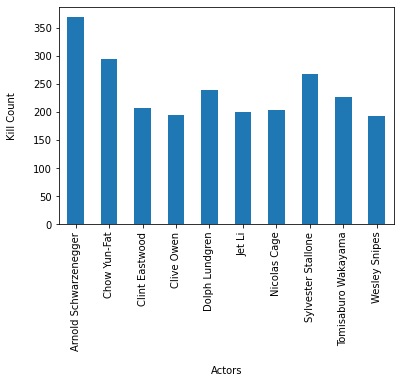

In [92]:
q8_plot = q8_data_csv.plot(x = 'Actor', y='Count', kind='bar', legend=False)
q8_plot.set_xlabel("\nActors")
q8_plot.set_ylabel("Kill Count\n")

### **Q9.**

In [93]:
# Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels 
# the categories, and shows the percentage breakdown of the categories.

In [94]:
q9_data_csv = pd.read_csv('roman-emperor-reigns.csv')

q9_data_csv

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


In [102]:
q9_new_ = q9_data_csv[q9_data_csv['Cause_of_Death'].apply(lambda x: 'Assassinated' in x)]
q9_new_

,Emperor,Length_of_Reign,Cause_of_Death
2,Caligula,4.83,Assassinated
5,Galba,0.58,Assassinated
7,Vitellius,0.67,Assassinated
10,Domitian,15.00,Assassinated
17,Commodus,15.00,Assassinated
18,Pertinax,0.25,Assassinated
21,Caracalla,19.00,Assassinated
22,Geta,3.00,Assassinated
24,Elagabalus,3.75,Assassinated
25,Severus Alexander,13.00,Assassinated


In [106]:
assassinated_ = []
not_assassinated_ = []

emperors_assassinated = len(q9_new_) / len(q9_data_csv)
emperors_not_assassinated = 1 - emperors_assassinated

assassinated_.append(emperors_assassinated)
not_assassinated_.append(emperors_not_assassinated)

In [109]:
temp_ = pd.DataFrame({'assassinated': assassinated_, 'not_assassinated': not_assassinated_}, index=['Assassinated', 'Not Assassinated'])

Text(0, 0.5, '')

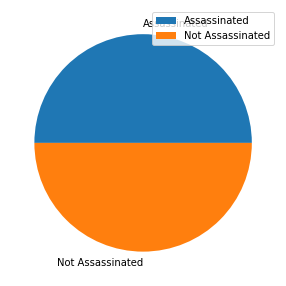

In [116]:
q9_plot = temp_.plot.pie(y='assassinated', figsize=(5, 5))
q9_plot.set_xlabel("")
q9_plot.set_ylabel("")

### **Q10.**

In [ ]:
# Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in 
# the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year.

In [51]:
q10_data_csv = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
q10_data_csv

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


<AxesSubplot:xlabel='Computer Science Doctorates Awarded (US)', ylabel='Total Arcade Revenue (billions)'>

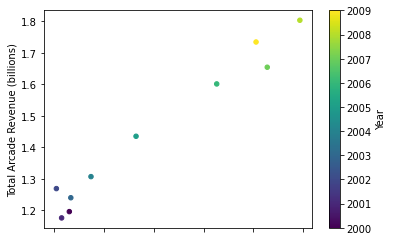

In [58]:
q10_plot = q10_data_csv.plot.scatter(y='Total Arcade Revenue (billions)', x='Computer Science Doctorates Awarded (US)', c='Year', colormap='viridis')
q10_plot